In [ ]:
import pandas as pd
import requests
import os

# === CONFIGURAÇÕES ===
caminho_arquivo = 'Jorge.xlsx'  # Ex: 'imagens.xlsx'
pasta_destino = 'imagens_baixadas'

# === CRIA A PASTA DE DESTINO SE NÃO EXISTIR ===
if not os.path.exists(pasta_destino):
    os.makedirs(pasta_destino)

# === LÊ A PLANILHA ===
df = pd.read_excel(caminho_arquivo)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,A,t,https://images.unsplash.com/photo-174610226839...,https://www.dpbmdev.com/_next/image/?url=%2Fim...
1,B,z,https://www.dpbmdev.com/_next/image/?url=%2Fim...,NaN


In [ ]:
def download_image(url, file_path):
    try:
        response = requests.get(url, stream=True, timeout=10)
        if response.status_code == 200:
            with open(file_path, 'wb') as f:
                f.write(response.content)
            print(f"[✓] Baixada: {file_path}")
    except Exception as e:
            print(f"[!] Erro ao baixar: {e}")

In [ ]:
for i in df.iterrows():
    row = i[1]

    name = row.iloc[0].strip().lower()

    total_cols = len(row)
    for column in range(2, total_cols):
       value = row.iloc[column]
       if(pd.isna(value)):
         continue
       filename = f'{name}_{column-1}.png'
       file_path = os.path.join(pasta_destino, filename)

       download_image(value,file_path)

[✓] Baixada: imagens_baixadas/a_1.png
[✓] Baixada: imagens_baixadas/a_2.png
[✓] Baixada: imagens_baixadas/b_1.png


In [ ]:
from IPython.display import Image

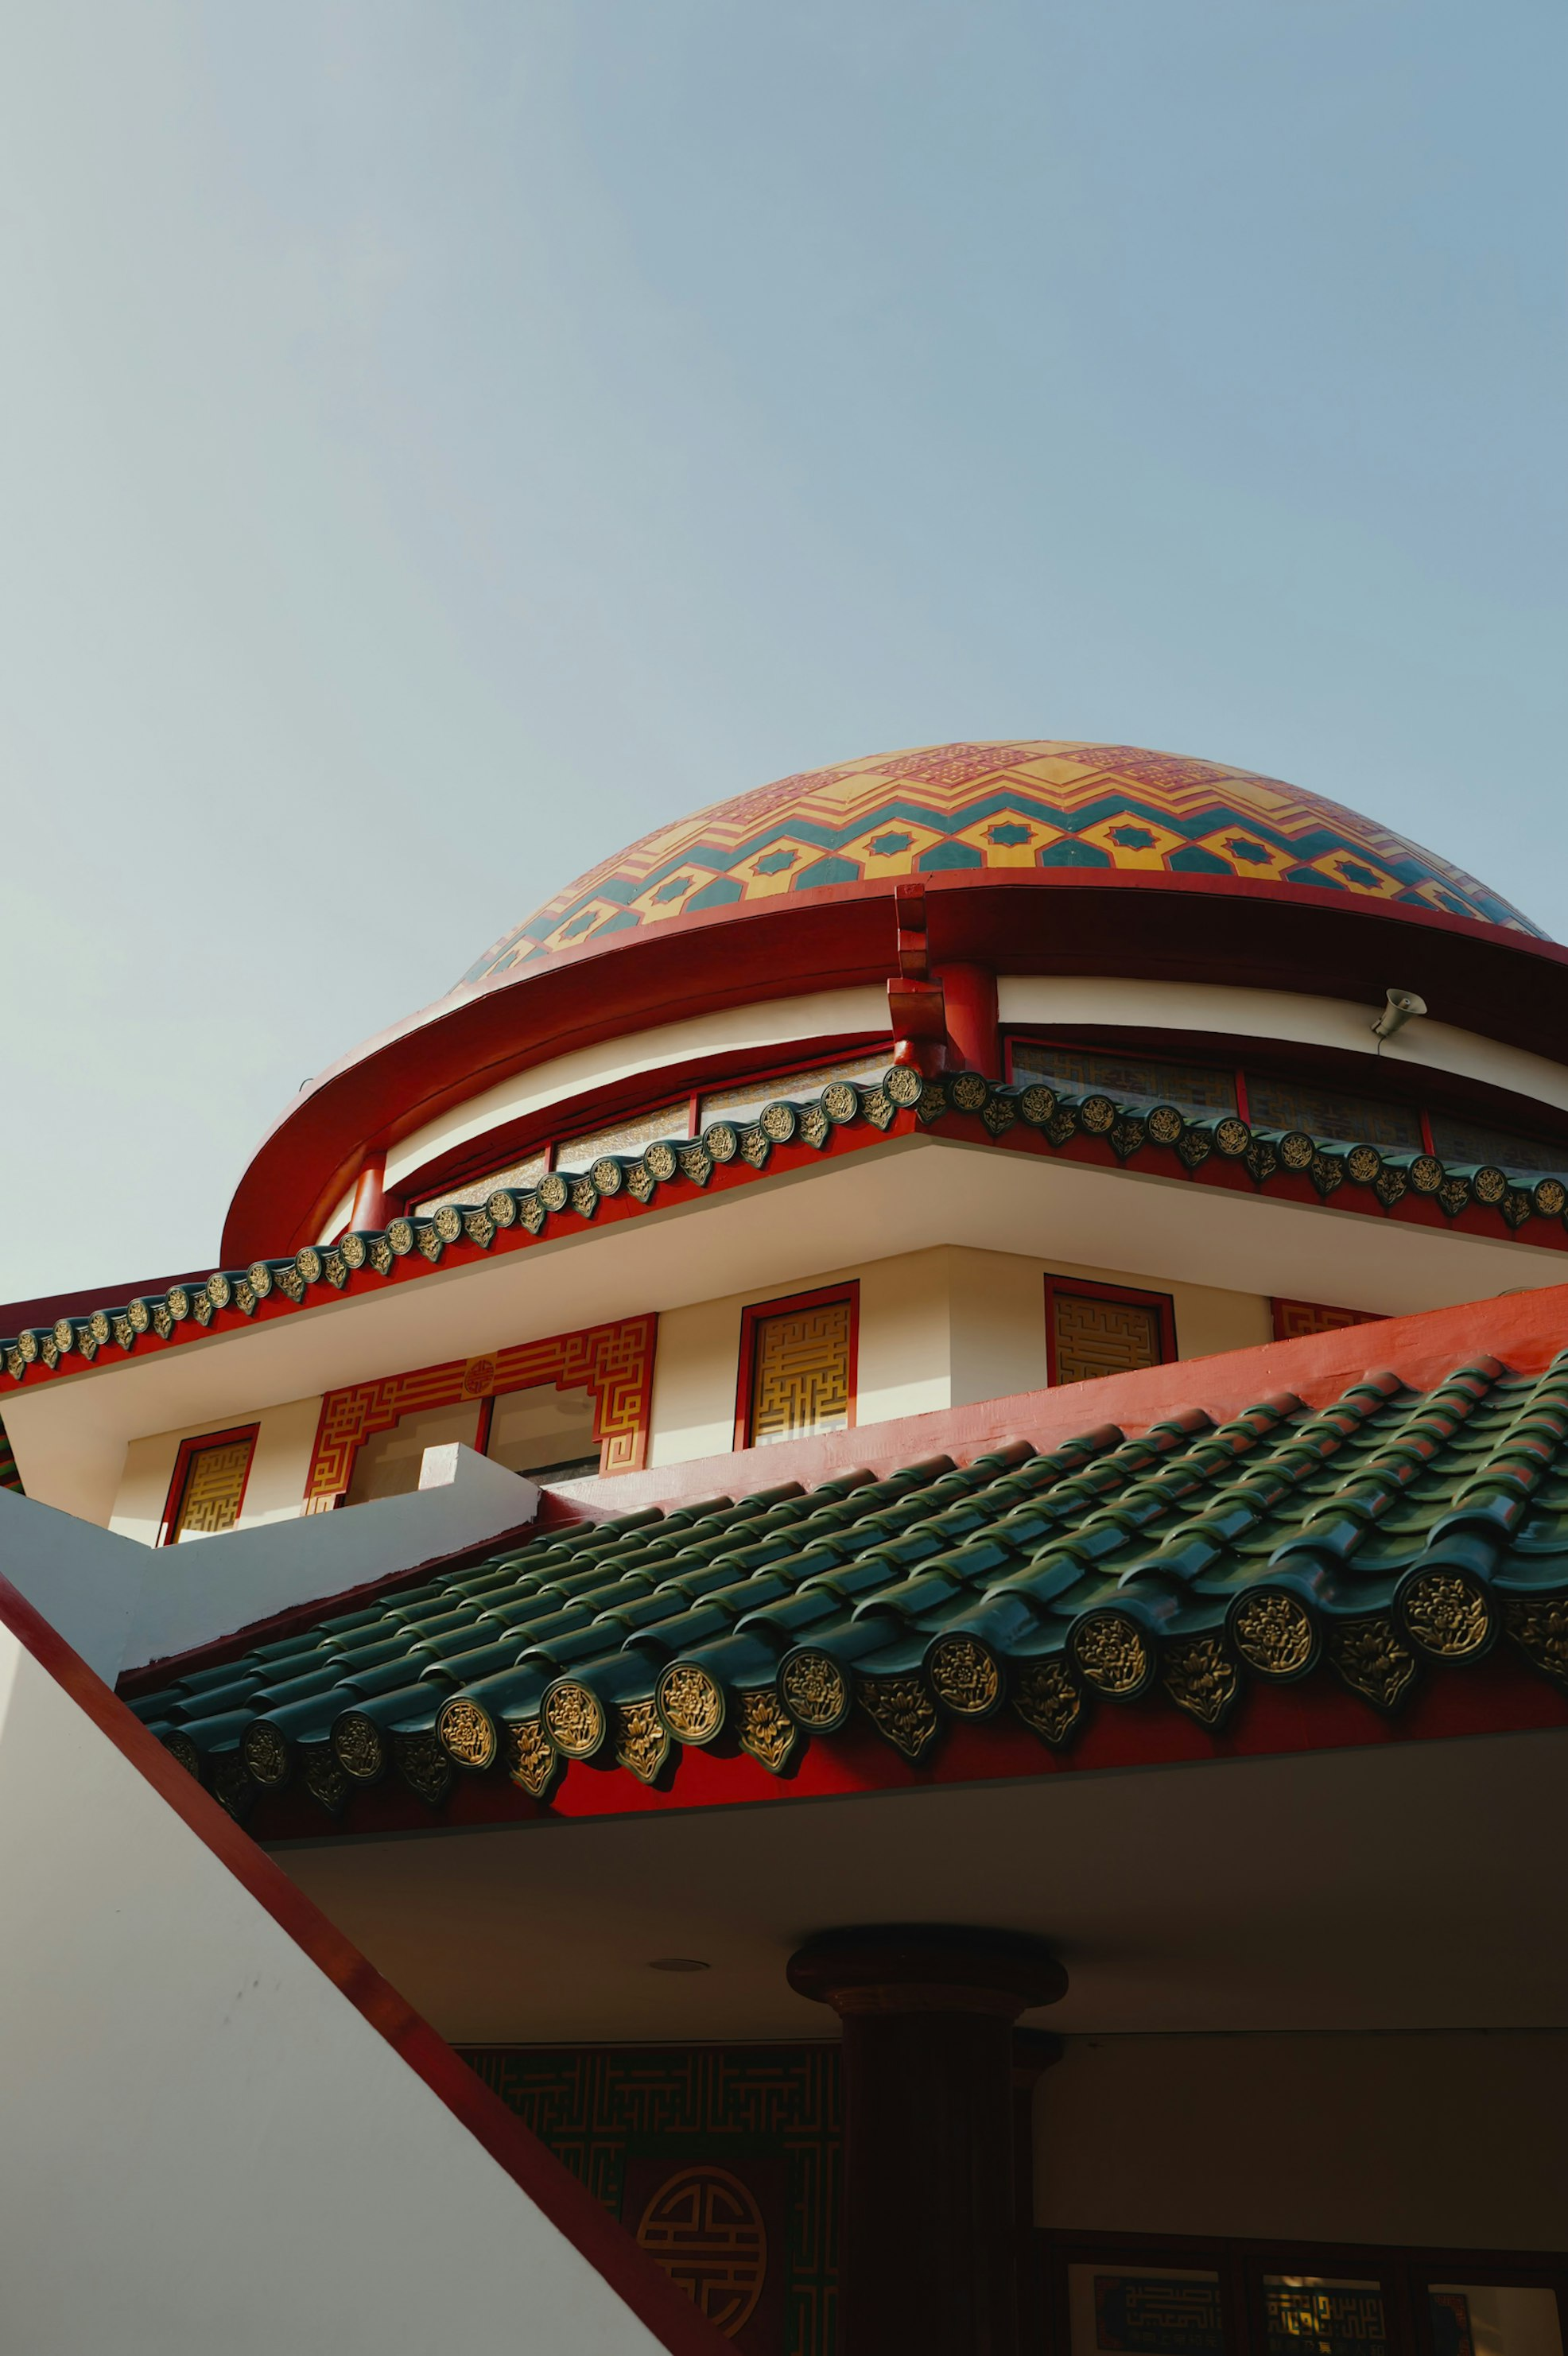

In [ ]:
display(Image('imagens_baixadas/a_1.png'))

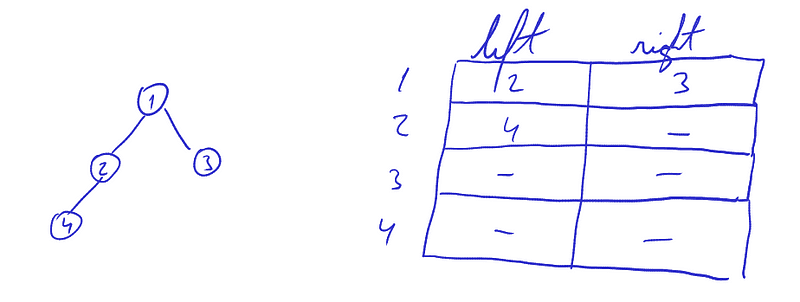

In [ ]:
display(Image('imagens_baixadas/b_1.png'))

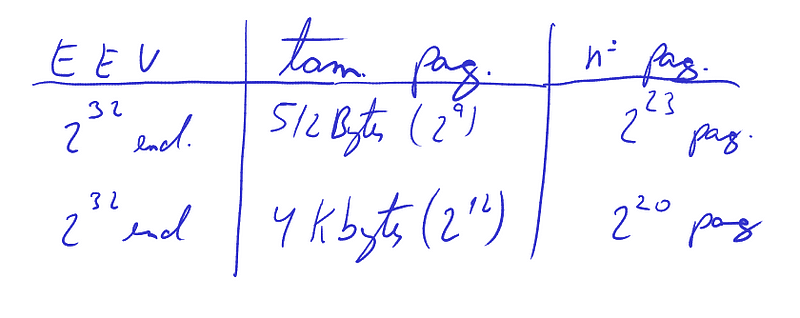

In [ ]:
display(Image('imagens_baixadas/a_2.png'))